In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [2]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-11-14 01:59:19--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-11-14 01:59:19--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf5e76600869d375a8663112608.dl.dropboxusercontent.com/cd/0/get/BwulGEkz-tJwCxpF6RUzzkx9TnAe3T-YXVCrIo15WQoGvHh6D-_UYDtkVQtJeFqQ3x9dml-aB-goKUvgcnYiUAlo959VGrqCpiutDJCD0WYKxouZyk7mqBiLjxCqxd6DX8Ajibk6cix5h7HVSFlBbIwr7xGuxZr5vF4Pz_Ekn7NdwYpQpA4ZdGLBiYWeAefOly8/file?dl=1# [following]
--2022-11-14 01:59:20--  https://ucf5e76600869d375a8663112608.dl.dropboxusercontent.com/cd/0/get/BwulGEkz-tJw

In [3]:
from konlpy.tag import Kkma, Hannanum, Komoran, Twitter, Okt, Mecab

In [4]:
kkma = Kkma()
okt = Okt()
komoran = Komoran()
hannanum = Hannanum()
twitter = Twitter()
mecab = Mecab()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [134]:
import os 
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = 'swMRG8plbs7LYwkTMHoz'
client_secret = 'jV02Ini3sh'

query = urllib.parse.quote(input("검색 질의: ")) #parse 해주는 이유 사용자 입력값 url로 넣을 수 있는 형태로 변환
idx = 0 
display = 100
start = 1 
end =1000    #네이버 최대 보여줄 수 있는 건 수 1000개

web_df = pd.DataFrame(columns=('Title','Link','Description'))

for start_index in range(start, end, display):


  url = 'https://openapi.naver.com/v1/search/webkr?query=' + query \
    + '&display=' + str(display) + '&start=' + str(start_index)

  request = urllib.request.Request(url)    #요청
  request.add_header('X-Naver-Client-Id', client_id)
  request.add_header('X-Naver-Client-Secret',client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')              # html 태그 특수기호 제거
      title = re.sub(remove_tag, '', items[item_index]['title'])
      link = items[item_index]['link']
      description = re.sub(remove_tag, '', items[item_index]['description'])
      web_df.loc[idx] = [title, link, description]
      idx += 1
  else :
    print("Error Code: " + rescode)

                                                      

   
web_df

검색 질의: 90년대생|청년


,Title,Link,Description
0,사원이 임원 법카 들여다본다…청년 스타트업 그들이 일하는 법 [90년대생 창업자가 ...,https://www.joongang.co.kr/article/25068619,PO 제도를 운영하는 어니스트펀드 서상훈(32) 대표는 &quot;PO 제도는 속도...
1,90년대생의 결혼법 : 칼럼 : 사설.칼럼 : 뉴스 : 한겨레,https://www.hani.co.kr/arti/opinion/column/100...,"엠제트(MZ)세대, 90년대생, 2030청년과 같은 단어가 끊임없이 쏟아져 나온다...."
2,90년대생 여성 노동자 &quot;우리는 일에 진심이다&quot;[플랫] - 경향신문,https://www.khan.co.kr/article/202111191022001,코로나19 이후 청년 여성들의 취업시장 배제가 가속화하는 상황에서 90년대생 여성 ...
3,90년대생이 말하는 '사회적경제 일터' 들어보실래요 &lt; 2030세이가담 &lt...,https://www.eroun.net/news/articleView.html?id...,90년대생 청년들이 사회적경제 현주소를 공론화한다.사회적경제 미디어 이로운넷(대표 ...
4,더불어민주당 90년대생 의원 모임 안산 청년시설 현장 방문 - 팍스경제TV,http://www.paxetv.com/news/articleView.html?id...,"경기도의회 더불어민주당 90년대생 의원 모임(장윤정, 장민수, 정동혁, 유호준, 이..."
...,...,...,...
144,삼성에 호통치는 90년대생…진중권 &quot;이런 국회 오랜만에 본다&quot; |...,https://www.joongang.co.kr/article/23891422,류 의원은 지난 7일 기자회견을 열고 &quot;삼성전자 간부가 언론사 기자출입증을...
145,EDITOR’S LETTER ‘이해진 키즈들’ 90년대생의 진격 - 이코노미조선,http://economychosun.com/client/news/view.php?...,이번 커버 스토리 ‘창업 新주류 90년대생’은 스타트업 생태계의 주류로 떠오르는 9...
146,90년대생이 퇴사하는 이유 | 직장in 생활백서 - 사람인,https://www.saramin.co.kr/zf_user/white-paper/...,젊은 직원들이 1년도 버티지 못하고 나가는 비율이 높은 조직이 있었습니다. 급여나 ...
147,"루한, 90년대생 최초 中 유력 시사잡지 표지 모델 - TV리포트",https://www.tvreport.co.kr/823727,특집호 주인공으로 선정된 이들 가운데 루한은 1990년대생 최초로 인물의 표지 모델...


In [135]:
web = []
for d in web_df.Description :
  web.append(d)

print(web[:5])

['PO 제도를 운영하는 어니스트펀드 서상훈(32) 대표는 &quot;PO 제도는 속도감 있게 일할 수 있는 스타트업 특유의 방식&quot;이라고 말했다. 비대면 진료 플랫폼 닥터나우는 코로나19로 2020년 3월부터 한시 허용된 비대면 진료 기회를 놓치지 않았다. ■ 90년대생 창업자가 온다 by FACTPL 「 팩플팀이 미래 산업(Future of Business)의...', '엠제트(MZ)세대, 90년대생, 2030청년과 같은 단어가 끊임없이 쏟아져 나온다. 그런데 과연 출생연도에 따른 세대 구분과 그에 따른 특성이라는 건 존재하는 걸까. 나는 1990년에 태어났고 새롬은 1992년에 태어났다.... ', '코로나19 이후 청년 여성들의 취업시장 배제가 가속화하는 상황에서 90년대생 여성 노동자의 일을 주제로 광범위한 조사가 이뤄진 것은 처음이다. ▼ “쌍팔년도 노동 환경 힘들다” 여성들의 이직 사유... ', '90년대생 청년들이 사회적경제 현주소를 공론화한다.사회적경제 미디어 이로운넷(대표 윤병훈)은 오는 8월 10일 개최하는 창사 13주년 기념 사회가치 컨퍼런스 ‘2030세이가담’의 첫 순서로 ‘90년대생 사회적경제 토크’를 연다고 밝혔다. 오전 10시 45분부터 11시 55분까지 진행된다.해당 세션에는 ▲노순호 동구밭 대표(1991년생) ▲박유진 이로운...', '경기도의회 더불어민주당 90년대생 의원 모임(장윤정, 장민수, 정동혁, 유호준, 이자형)은 지난 2일 장윤정 의원 주관으로 안산시 최초 청년공간 경기내일스퀘어 상상대로를 방문해 청년들이 이용하며 발생된 문제점과 개선사항 및 주요 추진실적을 보고받았다.이후 복합청년몰 신안코아 청년몰로 이동해 청년상인과 간담회를 통해 필...']


In [136]:
stop_words = ''
stop_words = stop_words.split(' ')
print(stop_words)

['']


In [137]:
tagger = Mecab()
web_nouns =[]
for w in web:
  for noun in tagger.nouns(w):
    if noun not in stop_words:
      web_nouns.append(noun)

web_nouns[:10]

['제도', '운영', '어니스트', '펀드', '서상훈', '대표', '제도', '속도', '일', '수']

In [228]:
# 네이버 블로그 키워드 분석
from pyparsing.helpers import original_text_for
import os 
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = 'swMRG8plbs7LYwkTMHoz'
client_secret = 'jV02Ini3sh'

query = urllib.parse.quote(input("검색 질의: ")) #parse 해주는 이유 사용자 입력값 url로 넣을 수 있는 형태로 변환
idx = 0 
display = 100
start = 1 
end =1000    #네이버 최대 보여줄 수 있는 건 수 1000개
sort = 'sim'  #유사도순으로 정렬

blog_df = pd.DataFrame(columns=('Title','Link','Description','Blogger Name', 'Blogger Link'))

for start_index in range(start, end, display):


  url = 'https://openapi.naver.com/v1/search/blog?query=' + query \
    + '&display=' + str(display) + '&start=' + str(start_index) + '&sort=' + sort

  request = urllib.request.Request(url)    #요청
  request.add_header('X-Naver-Client-Id', client_id)
  request.add_header('X-Naver-Client-Secret',client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if(rescode==200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['items']
    for item_index in range(0, len(items)):
      remove_tag = re.compile('<.*?>')              # html 태그 특수기호 제거
      title = re.sub(remove_tag, '', items[item_index]['title'])
      link = items[item_index]['link']
      description = re.sub(remove_tag, '', items[item_index]['description'])
      blogger_name = items[item_index]['bloggername']
      blogger_link = items[item_index]['bloggerlink']
      blog_df.loc[idx] = [title, link, description , blogger_name,blogger_link]
      idx += 1
  else :
    print("Error Code: " + rescode)

                                                      

   
blog_df

검색 질의: 인천여행|중년


,Title,Link,Description,Blogger Name,Blogger Link
0,로컬치유여행 [중년의 노는법],https://blog.naver.com/redpig9101/222607966008,#로컬치유여행 #중년의노는법 #노는법 #중년여성의노는법 #치유농업 #치유여행 #우리...,4060치유여행,blog.naver.com/redpig9101
1,"* 인천 여행_근현대사, 차이나, 일본, 동화. 대체 컨셉이 몇 개야",https://blog.naver.com/oroicci31/222922945686,한미수교100주년기념탑도 보러 갔는데 그 안에서 중년부부가 배드민턴을 치고 계셨다....,최녕 블로그,blog.naver.com/oroicci31
2,"꽃보다 중년 마카오 자유여행, 윈Wynn카지노 프리룸 그리고...",https://blog.naver.com/johntwok/222183739699,인천공항 떠날 때 한병사고.. 마지막에 합류한 멤버가 사 온 죠니워커 블루를 두병째...,뉴요커 John의 블로그,blog.naver.com/johntwok
3,(인천여행) 영흥도 십리포와 장경리해수욕장 산책!,https://blog.naver.com/7607song/222808476233,【인천여행 일정】 신시모도 가는 길☞모도☞시도·신도☞장봉도 가는 길☞장봉도☞자유공원...,모모의 나루터,blog.naver.com/7607song
4,인천 여행,https://blog.naver.com/hth0308/222788782030,이곳 저곳에서 중년을 위한 버스킹이 한창이라 좀 웃겼다. 세번째로 간곳은 인천 송도...,여행과 요리,blog.naver.com/hth0308
...,...,...,...,...,...
995,2018.11.01 대만여행,https://blog.naver.com/aussie98/221389960234,걱정반 기대반으로 아침 일찍 인천국제공항2 터미널로 갔다 처음으로 2터미널에 도착하...,aussie98님의 블로그,blog.naver.com/aussie98
996,인도네시아 여행 6 -2일차 - 3 #파타힐라광장 #해양박물관...,https://blog.naver.com/dream3004200/221423585087,"여행을 마치고 인천공항에 도착했을 때, 입국장에 들어서면서 우연히 앞좌석에 앉은 중...",오드리팩토리(천연사랑),blog.naver.com/dream3004200
997,"[부여, 보령, 태안 여행]",https://blog.naver.com/jsy0548/222190651417,늘어나면서 여행지에서 여행객들이 어떻게 형성된 그룹인지 대략적으로 쉽게 알 수가 있...,jsy0548님의블로그,blog.naver.com/jsy0548
998,"일본 사가 여행① 사가공항에서 사가역까지, 라라라라멘",https://blog.naver.com/babtol2000/221163226655,일본 여행 갈 때마다 애용하는 기내용 가방. 짐 부칠 일이 없어 편하다. 인천-사가...,토토로의 여행공작소,blog.naver.com/babtol2000


In [236]:
blog = []
for b in blog_df.Description:
  blog.append(b)


print(blog[:5])

['#로컬치유여행 #중년의노는법 #노는법 #중년여성의노는법 #치유농업 #치유여행 #우리끼리여행 #가족여행... 쉼드림에서는 여행플렛폼 노는법과 함께하는 로컬여행을 함께합니다. 서울에서, 인천에서, 안산에서... ', '한미수교100주년기념탑도 보러 갔는데 그 안에서 중년부부가 배드민턴을 치고 계셨다. 여기 말소리도 잘... #인천여행 #차이나타운 #송월동동화마을 #차이나타운먹방 #자유공원 #인천상륙작전', '인천공항 떠날 때 한병사고.. 마지막에 합류한 멤버가 사 온 죠니워커 블루를 두병째 따고.. 야식을 마치고 각자 좋아하는 게임을 하면서 마카오의 꽃보다 중년 카지노 여행의 또 하루는 지나갔습니다..... ', '【인천여행 일정】 신시모도 가는 길☞모도☞시도·신도☞장봉도 가는 길☞장봉도☞자유공원 산책... 바람이 제법 세차게 부는 해변에는 갈매기도 쉬는 중이고, 추억을 만드는 중년부부의 행복한 일상이... ', '이곳 저곳에서 중년을 위한 버스킹이 한창이라 좀 웃겼다. 세번째로 간곳은 인천 송도센트럴파크공원.... 여행은 정말 좋은 취미다. 특히 마음 맞는 사람과 편하게 좋은 거 구경다니고 맛있는거 먹으니 이뵈다... ']


In [267]:
stop_words = '남자 여행지 모습 여기 일정 다음 팀 항공 터미널 앞 부부 옆 나이 듯 남성 아저씨 출발 중년 기자 나라 지역 작가 문 가능 경기 일본 시절 간 대표 뉴스 하우스 공정 최근 위 당시 대학 기업 도 점 하나 지원 부산 문제 학교 여성 돈 책 집 때문 편 앞장 처음 이유 속 이 제 데 이후 시작 경제 차 이야기 창업 생각 시대 해외 인천광역시 대생 청년 세대 대 중국 그 사람 사회 말 한국 미국 서울 해외여행 겨울 유럽 세 성인 싱 금 파리 프로 듀 한국인 최초 항해사 환경 지구 랩 프로 듀 그린피스 인천 이곳 청소년 공간 다누 이달 휴먼 여름 방학 회관 엄선 개 코로나 북 길 호 티 웨이 후 운항 말씀 스케줄 후 여행 일 월 시간 공항 도착 나 년 때 수 시 날 만 분 비행기 것 정 거 전 번 이번 우리 박 곳 내 중 정도 리 이상 자리 거리 위치 유명 서쪽 소개 주 원 층 등 끝 게 명 저'
stop_words = stop_words.split(' ')
print(stop_words)

['남자', '여행지', '모습', '여기', '일정', '다음', '팀', '항공', '터미널', '앞', '부부', '옆', '나이', '듯', '남성', '아저씨', '출발', '중년', '기자', '나라', '지역', '작가', '문', '가능', '경기', '일본', '시절', '간', '대표', '뉴스', '하우스', '공정', '최근', '위', '당시', '대학', '기업', '도', '점', '하나', '지원', '부산', '문제', '학교', '여성', '돈', '책', '집', '때문', '편', '앞장', '처음', '이유', '속', '이', '제', '데', '이후', '시작', '경제', '차', '이야기', '창업', '생각', '시대', '해외', '인천광역시', '대생', '청년', '세대', '대', '중국', '그', '사람', '사회', '말', '한국', '미국', '서울', '해외여행', '겨울', '유럽', '세', '성인', '싱', '금', '파리', '프로', '듀', '한국인', '최초', '항해사', '환경', '지구', '랩', '프로', '듀', '그린피스', '인천', '이곳', '청소년', '공간', '다누', '이달', '휴먼', '여름', '방학', '회관', '엄선', '개', '코로나', '북', '길', '호', '티', '웨이', '후', '운항', '말씀', '스케줄', '후', '여행', '일', '월', '시간', '공항', '도착', '나', '년', '때', '수', '시', '날', '만', '분', '비행기', '것', '정', '거', '전', '번', '이번', '우리', '박', '곳', '내', '중', '정도', '리', '이상', '자리', '거리', '위치', '유명', '서쪽', '소개', '주', '원', '층', '등', '끝', '게', '명', '저']


In [268]:
tagger = Mecab()
blog_nouns = []
for b in blog:
  for noun in tagger.nouns(b):
    if noun not in stop_words:
      blog_nouns.append(noun)

blog_nouns[:10]

['로컬', '치유', '법', '노', '법', '법', '치유', '농업', '치유', '가족']

In [269]:
from collections import Counter
blog_nouns_counter = Counter(blog_nouns)
top_blog_nouns = dict(blog_nouns_counter.most_common(100))
top_blog_nouns

{'사진': 73,
 '친구': 61,
 '가족': 57,
 '카페': 47,
 '자유': 44,
 '차이나타운': 40,
 '버스': 40,
 '송도': 40,
 '섬': 40,
 '공원': 39,
 '커플': 37,
 '호텔': 37,
 '아침': 35,
 '아이': 33,
 '바다': 33,
 '배낭': 32,
 '맛집': 32,
 '이용': 31,
 '꽃': 30,
 '코스': 29,
 '추천': 27,
 '국제공항': 27,
 '택시': 27,
 '여자': 27,
 '새벽': 27,
 '혼자': 27,
 '비행': 26,
 '추억': 25,
 '준비': 25,
 '신혼': 25,
 '쪽': 25,
 '마음': 24,
 '영종': 24,
 '여행객': 24,
 '라운지': 24,
 '행복': 23,
 '도시': 23,
 '여행기': 23,
 '데이트': 23,
 '계획': 23,
 '엄마': 23,
 '홍콩': 23,
 '투어': 22,
 '짐': 22,
 '월미도': 21,
 '당일': 21,
 '탑승': 21,
 '단체': 21,
 '아시아': 21,
 '가방': 21,
 '마지막': 20,
 '강화': 20,
 '글': 20,
 '숙소': 20,
 '배': 20,
 '좌석': 20,
 '동안': 20,
 '베트남': 20,
 '여유': 19,
 '오늘': 19,
 '뒤': 19,
 '당일치기': 19,
 '이동': 19,
 '아주머니': 19,
 '어디': 19,
 '밤': 19,
 '남편': 19,
 '영화': 19,
 '패키지': 19,
 '풍경': 18,
 '가을': 18,
 '아줌마': 18,
 '장소': 18,
 '프랑스': 18,
 '마을': 17,
 '관광': 17,
 '건': 17,
 '달': 17,
 '오전': 17,
 '줄': 17,
 '후기': 17,
 '대부분': 17,
 '국제': 17,
 '기억': 17,
 '오후': 17,
 '대한항공': 17,
 '경유': 17,
 '둘': 17,
 '시장': 16,
 '기분': 16,

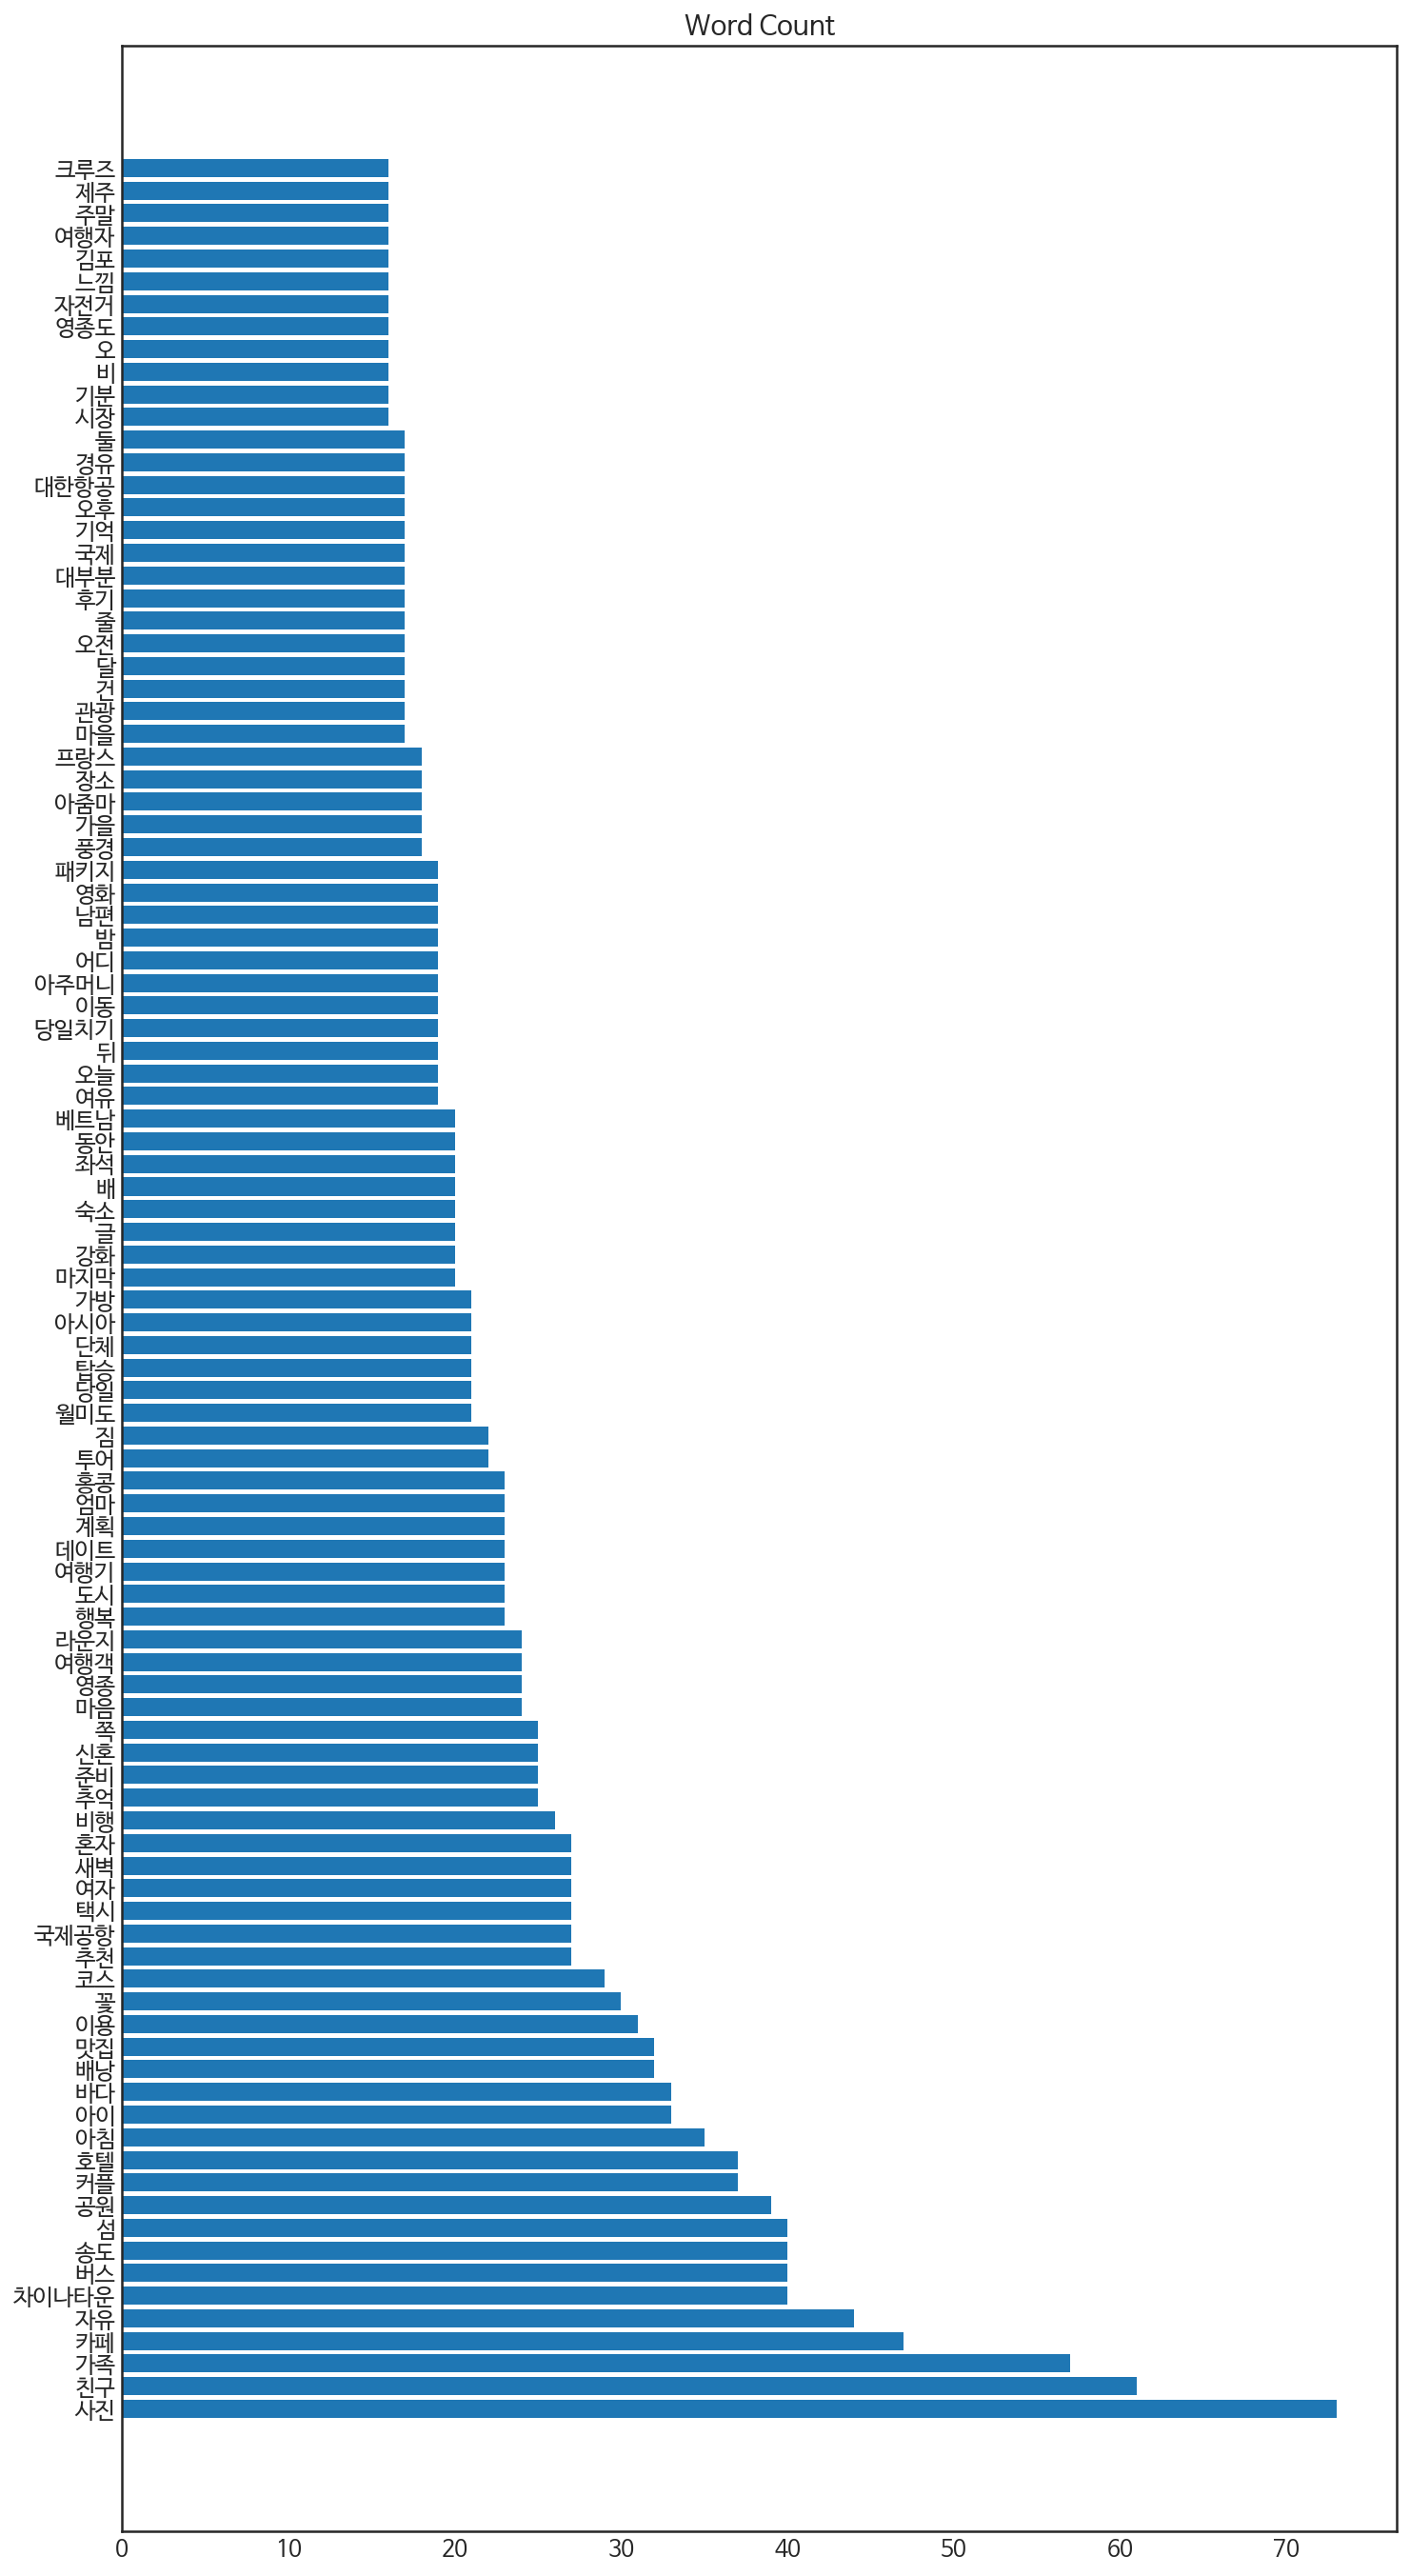

In [270]:
#단어 빈도 시각화
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_blog_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos,top_blog_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos,top_blog_nouns.keys())
plt.show()

In [198]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


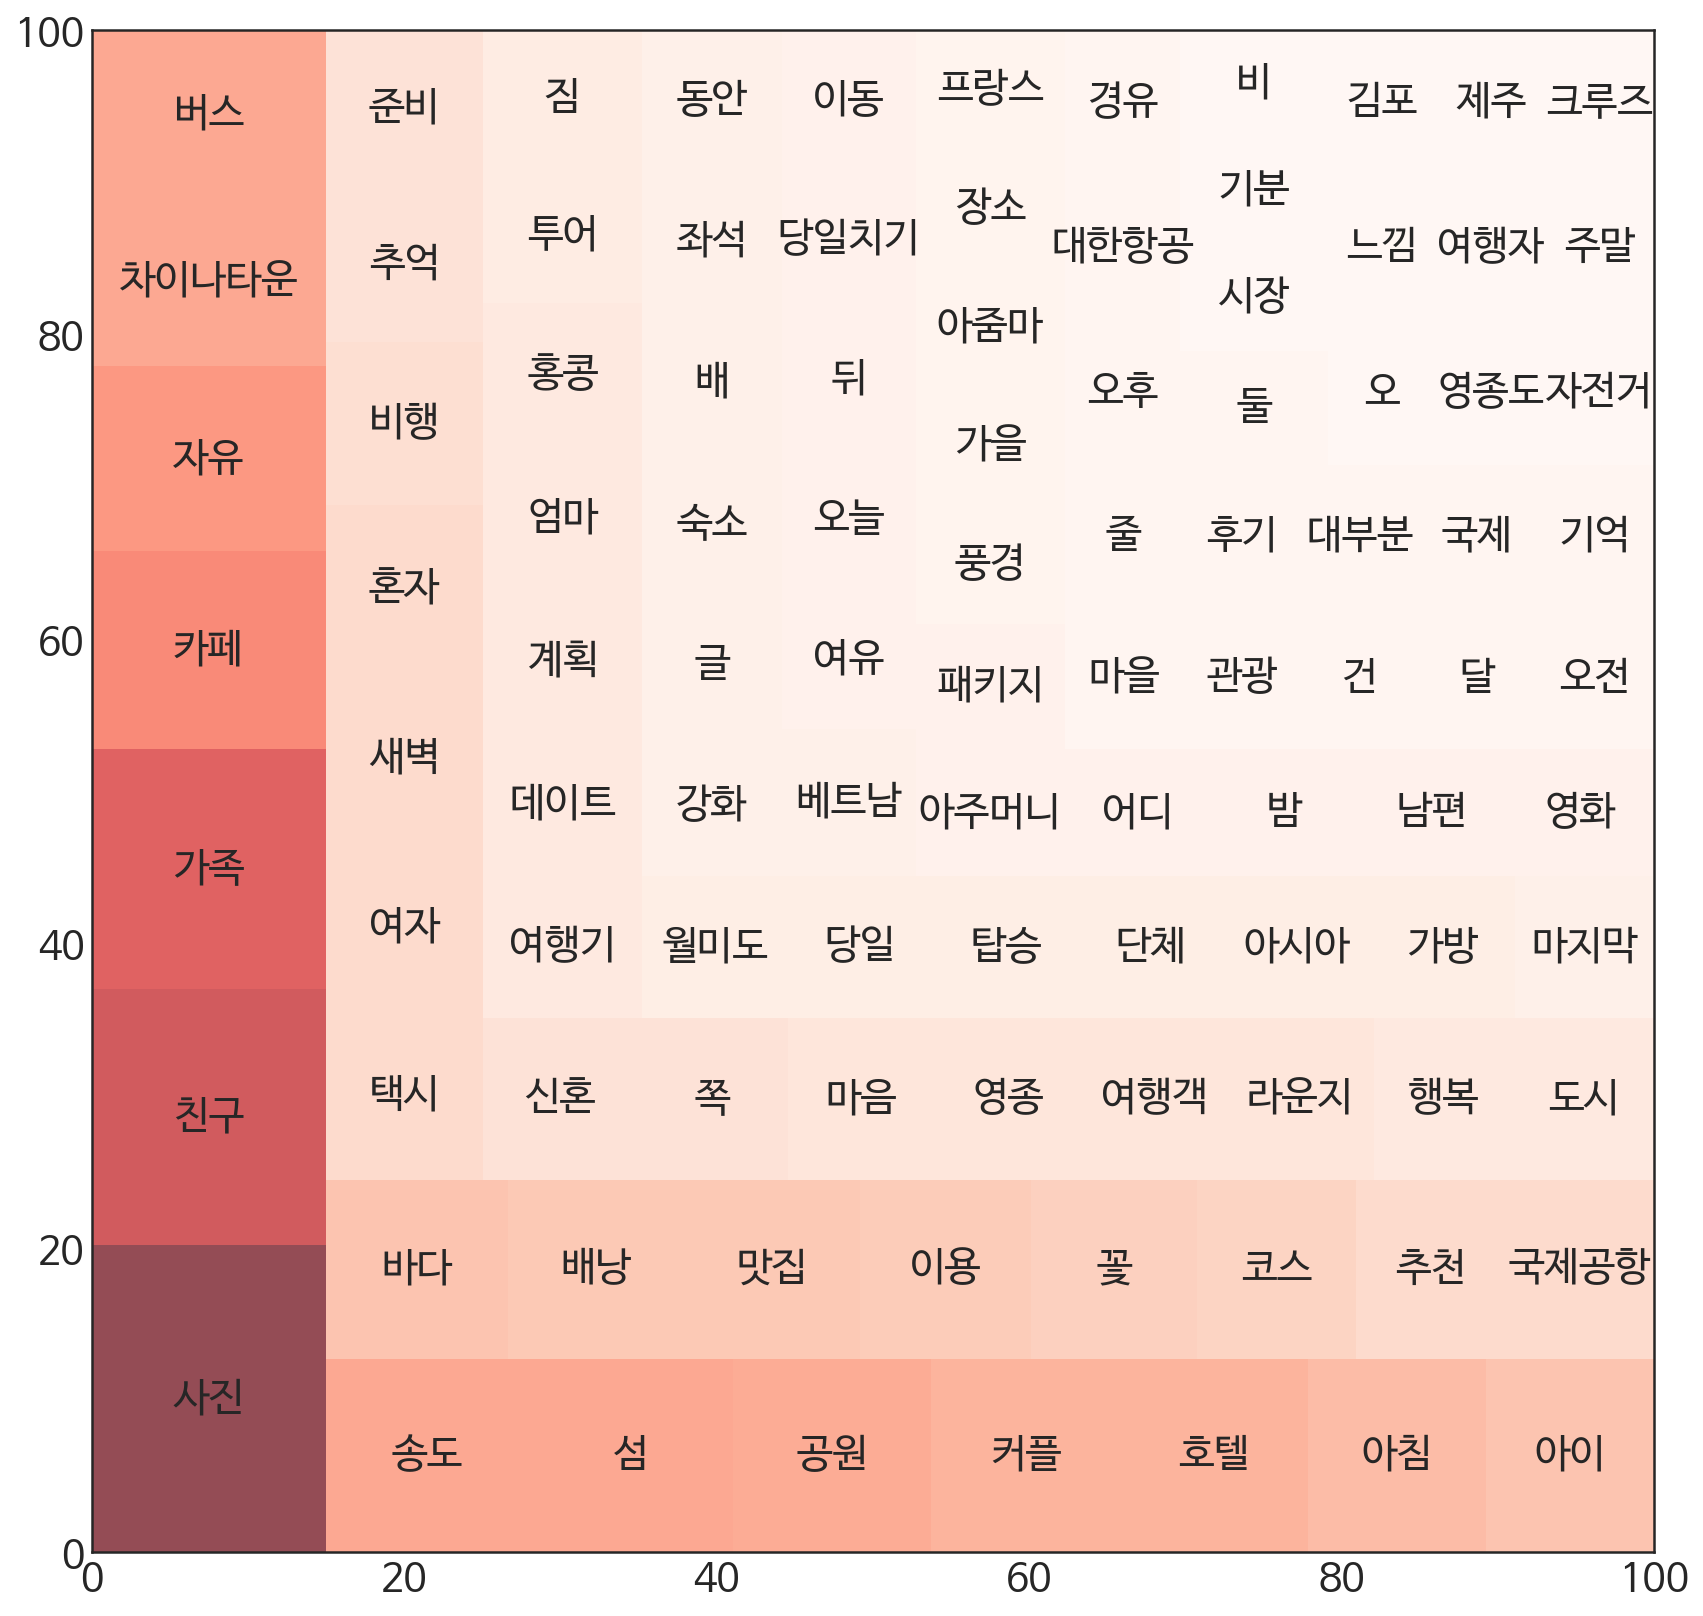

In [271]:

import squarify
plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin = min(top_blog_nouns.values()), 
                            vmax = max(top_blog_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_blog_nouns.values()]

squarify.plot(label = top_blog_nouns.keys(),
              sizes= top_blog_nouns.values(),
              color = colors,
              alpha =.7);


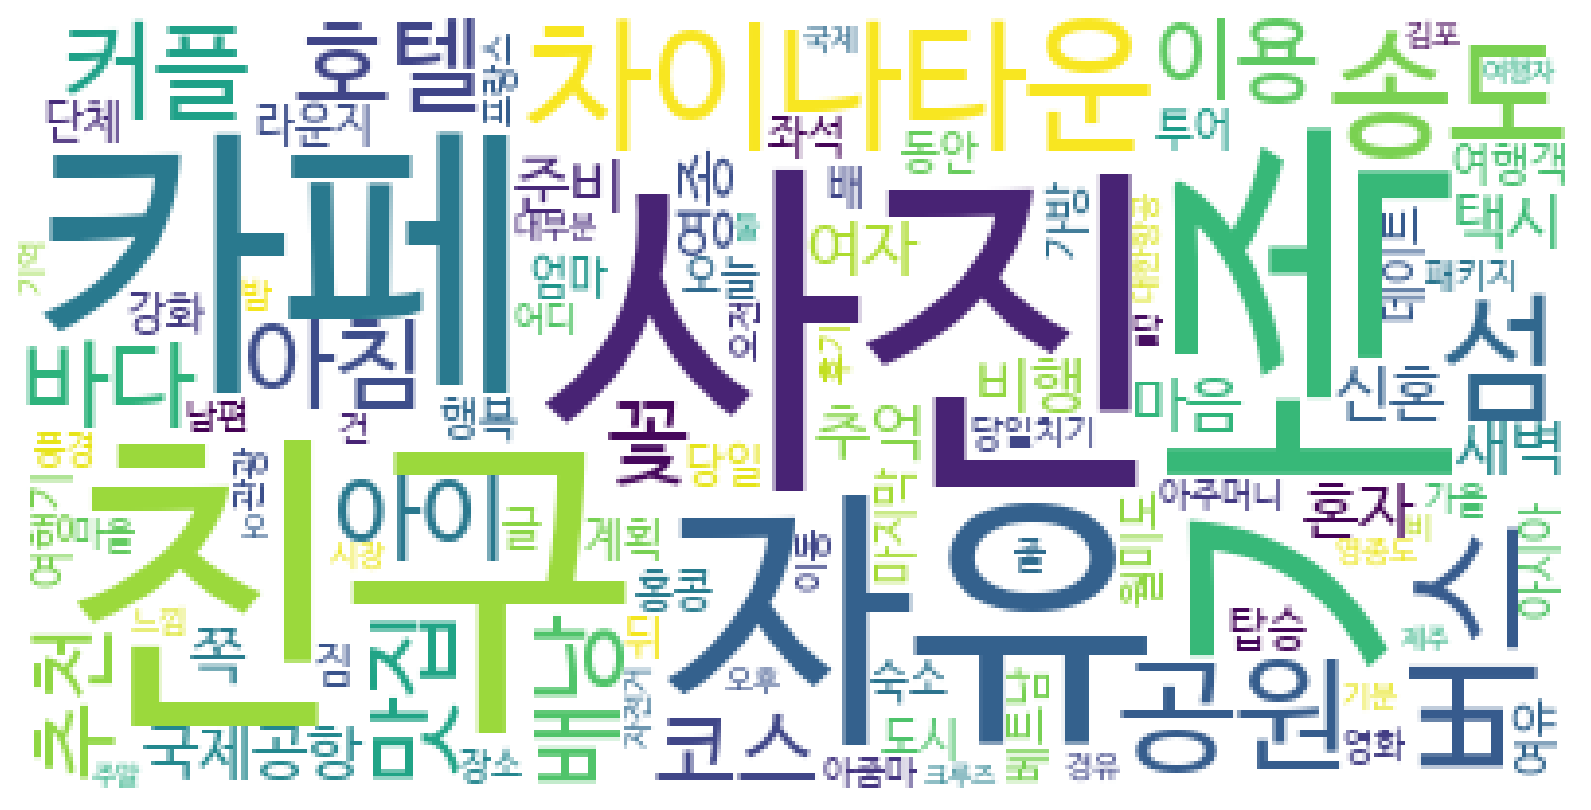

In [272]:
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white', font_path = './font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_blog_nouns)

figure = plt.figure(figsize=(14,14))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show()


In [90]:
blog_df.to_csv("blog_dataframe.csv",encoding='utf-8-sig',index = False)